<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/3DFACEMODELING/3D_cube_rotation_and_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

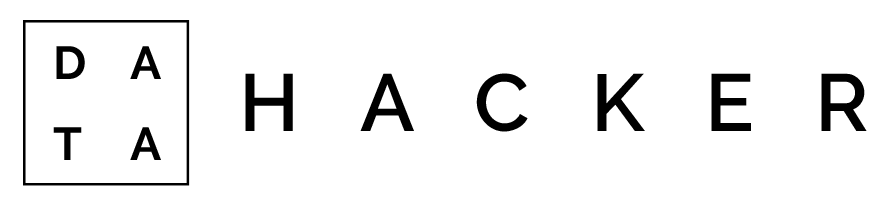
# 3D Cube Rotation and Projection examples

In this post, we will see examples and how we can rotate 3D objects. We will see how we can rotate a 3D cube around each axis, the $x, y, z$ axes.

## Definition of the cube 

Now, we will do an example in Python by creating a 3D object which will consist of points with 3 dimensions. This 3D object will be a cube and we will rotate it around the 3 axes, and using a simple projection we will project it into a 2D image.

First, let us first import all the needed dependencies. We will do all the drawings using OpenCV and matplotlib. Due to the use of google collab, for this example, we will import cv2_imshow to analyze images inside of it.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

We also need to set up parameters that will be used for image setup and initial angles, which will be zero values and no rotations. Next to these parameters, the center of the screen coordinate is calculated which will be used as a reference where to draw our cube.

In [3]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
BLACK = (0, 0, 0)

WIDTH = 800
HEIGHT = 600

scale = 100
circle_pos = [WIDTH//2, HEIGHT//2]

angle_x = angle_y = angle_z = 0

Now, let us create a 3D object, in this case, a 3D cube. This cube will be later rotated around the x, y, and Z axes.

In [4]:
points = np.array ([[-1,-1, 1], 
                    [ 1,-1, 1], 
                    [ 1, 1, 1], 
                    [-1, 1, 1], 
                    [-1,-1,-1], 
                    [ 1,-1,-1], 
                    [ 1, 1,-1], 
                    [-1, 1,-1]])

You can see our 3D cube scattered in the plot below.

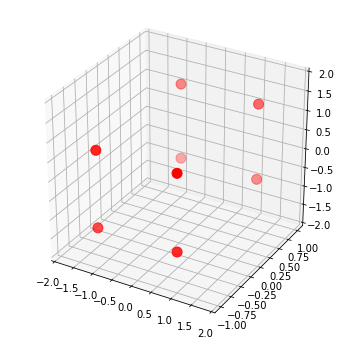

In [5]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', s=100)
ax.set_xlim([-2, 2])
ax.set_xlim([-2, 2])
ax.set_zlim([-2, 2])
plt.show()

## Additional functions and variables

Next, we will define our projection matrix, and because this is just an explanatory example, it will take the form of a simple projection matrix. We just remove the third axis, the Z axis. Alternatively to remove this $3^{rd}$ row, just set the values in the third row to zeros. If you want to learn more about projection matrices, refer to this [post](https://datahacker.rs/camera-calibration-perspective-projection/).

In [6]:
projection_matrix = np.matrix([
    [1, 0, 0],
    [0, 1, 0]
])

We will also create a list that will hold X and Y coordinates after the projection of our cube vertices.

In [7]:
projected_points = [
    [n, n] for n in range(len(points))
]

Creating a function `connect_points` that will draw lines between the points, connecting them.

In [8]:
def connect_points(screen, i, j, points):
    cv2.line(screen, (points[i][0], points[i][1]), (points[j][0], points[j][1]), BLACK, 1)
    return screen

## Understanding the rotation 

Now comes the interesting part the rotation. Let us first do a rotation for one single frame and after we will see an animation.

The first thing we need to do is create a blank canvas. This will be achieved using `np.ones()` and creating an image of size (800x600).

(600, 800, 3)


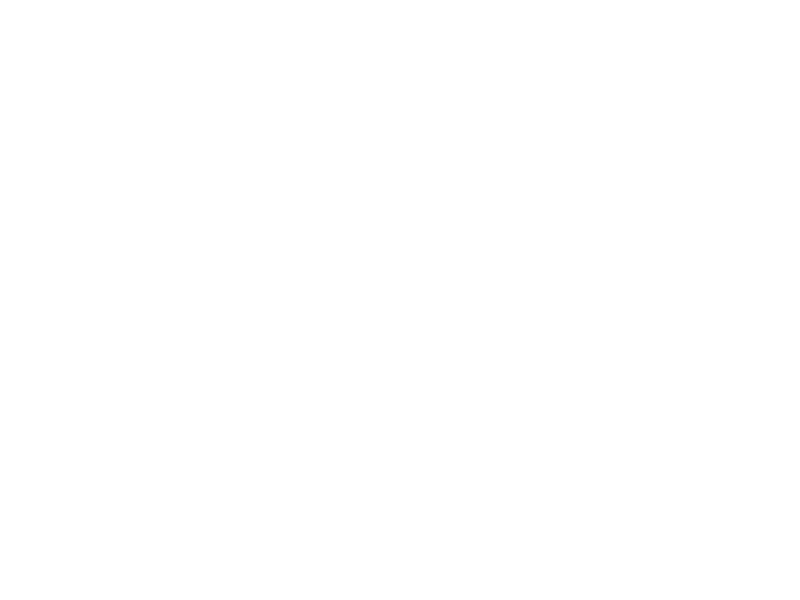

In [9]:
screen = np.ones((HEIGHT, WIDTH, 3), dtype=np.uint8) * 255
print(screen.shape)
cv2_imshow(screen)

To be able to rotate something in 3D, we need to choose around which axes we want the rotation to happen. We can rotate a 3D object around one axis, or multiple, as we wish. For each axis, a different rotation matrix is used. Here are the matrices for each of the axis:

$$ R_x(\theta) = \begin{bmatrix} 1 & 0 & 0\\ 0 & \cos{\theta} & -\sin{\theta} \\ 0 & \sin{\theta} & -\cos{\theta} \end{bmatrix}
%
R_y (\theta) = \begin{bmatrix} \cos{\theta} & 0 & \sin{\theta}\\ 0 & 1 & 0 \\ -\sin{\theta} & 0 & \cos{\theta} \end{bmatrix}
%
R_z(\theta) = \begin{bmatrix} \cos{\theta} & -\sin{\theta} & 0 \\ \sin{\theta} & -\cos{\theta} & 0 \\ 0 & 0 & 1\\  \end{bmatrix}$$

This is how we can implement these rotation matrices in code.

In [10]:
rotation_z = np.matrix([
    [np.cos(angle_x), -np.sin(angle_x), 0],
    [np.sin(angle_x),  np.cos(angle_x), 0],
    [     0,                 0,        1],
])

rotation_y = np.matrix([
    [ np.cos(angle_y), 0, np.sin(angle_y)],
    [       0,         1,        0       ],
    [-np.sin(angle_y), 0, np.cos(angle_y)],
])

rotation_x = np.matrix([
    [1,       0,                0        ],
    [0, np.cos(angle_z), -np.sin(angle_z)],
    [0, np.sin(angle_z),  np.cos(angle_z)],
])
print("Rotation matrix around x axis:")
print(rotation_x)

print("Rotation matrix around y axis:")
print(rotation_y)

print("Rotation matrix around z axis:")
print(rotation_z)

Rotation matrix around x axis:
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
Rotation matrix around y axis:
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]
Rotation matrix around z axis:
[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


## Process of rotating a 3D cube

As we have defined our rotation matrices, let us see how we can plot our points and how they currently look in 2D. For this, we will use the projection matrix that we previously created and also the points. We will use the dot product to project the points from one dimension to the other. After that, we will scale our points, just so that we see our points in the drawing, and also we will translate/shift the points to the center of the screen.

We will save the values into the list that we have previously created so that we know where to draw the lines to connect the points. The remaining parts of the code are simply the drawing of points and lines.

Note: because we are drawing on OpenCV we need to reset the canvas every time we draw on it.

Below, we can see the output image, where we can see that only 4 sides are visible because the rest are behind these four.

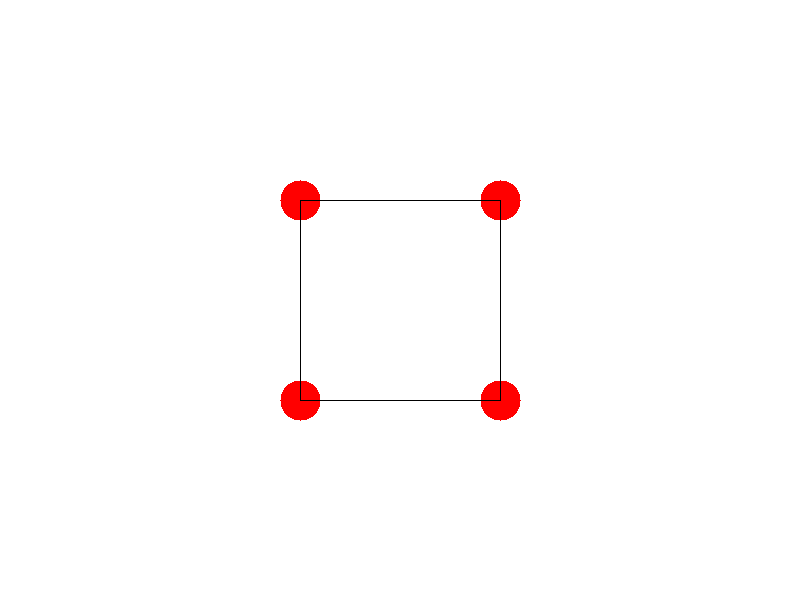

In [ ]:
screen = np.ones((HEIGHT, WIDTH, 3), dtype=np.uint8) * 255

i = 0
for point in points:
    projected2d = np.dot(projection_matrix, point.reshape((3, 1)))

    x = int(projected2d[0][0] * scale) + circle_pos[0]
    y = int(projected2d[1][0] * scale) + circle_pos[1]

    projected_points[i] = [x, y]
    screen = cv2.circle(screen, (x, y), 20, RED, -1)
    i += 1

for p in range(4):
    screen = connect_points(screen, p, (p+1) % 4, projected_points)
    screen = connect_points(screen, p+4, ((p+1) % 4) + 4, projected_points)
    screen = connect_points(screen, p, (p+4), projected_points)
cv2_imshow(screen)

The interesting thing happens when we multiply the points with the rotation matrices. For example, if we just add a little bit to the Z axis and calculate the rotation matrix, and after we multiply the points with the rotation matrices, we can see that our cube has rotated. We can now see all the vertices of our cube.

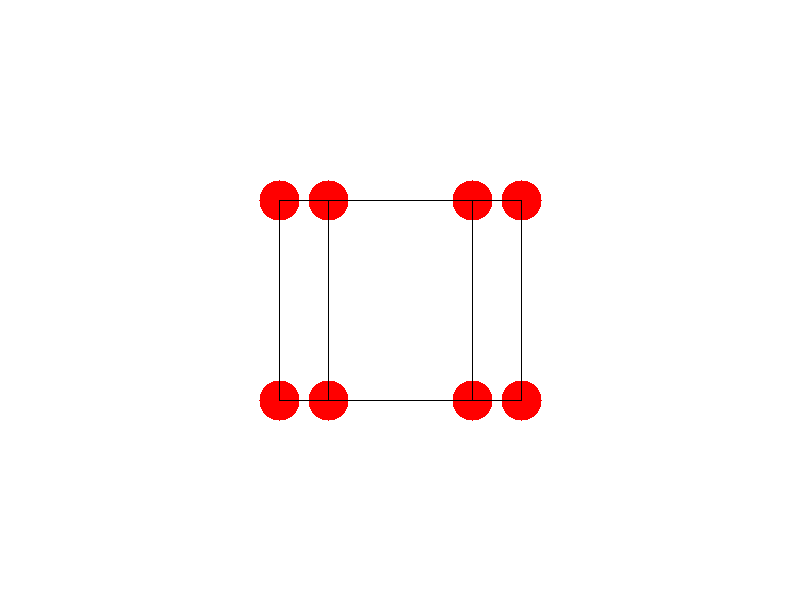

In [11]:
angle_x = angle_y = angle_z = 0

angle_x += 0.00
angle_y += 0.25
angle_z += 0.00

rotation_z = np.matrix([
    [np.cos(angle_x), -np.sin(angle_x), 0],
    [np.sin(angle_x),  np.cos(angle_x), 0],
    [     0,                 0,        1],
])

rotation_y = np.matrix([
    [ np.cos(angle_y), 0, np.sin(angle_y)],
    [       0,         1,        0       ],
    [-np.sin(angle_y), 0, np.cos(angle_y)],
])

rotation_x = np.matrix([
    [1,       0,                0        ],
    [0, np.cos(angle_z), -np.sin(angle_z)],
    [0, np.sin(angle_z),  np.cos(angle_z)],
])

screen = np.ones((HEIGHT, WIDTH, 3), dtype=np.uint8) * 255

i = 0
for point in points:
    rotated3d = np.matmul(rotation_z, point.reshape((3, 1)))
    rotated3d = np.matmul(rotation_y, rotated3d)
    rotated3d = np.matmul(rotation_x, rotated3d)

    projected2d = np.matmul(projection_matrix, rotated3d)

    x = int(projected2d[0][0] * scale) + circle_pos[0]
    y = int(projected2d[1][0] * scale) + circle_pos[1]

    projected_points[i] = [x, y]
    screen = cv2.circle(screen, (x, y), 20, RED, -1)
    i += 1

for p in range(4):
    screen = connect_points(screen, p, (p+1) % 4, projected_points)
    screen = connect_points(screen, p+4, ((p+1) % 4) + 4, projected_points)
    screen = connect_points(screen, p, (p+4), projected_points)
cv2_imshow(screen)

Let us now create some animations. The same as before, just now in a for a loop. We will create a video with a rotation around only the $latex X$ axis. We will create a video of 5 seconds with an FPS of 30.

In [13]:
angle_x = angle_y = angle_z = 0

out = cv2.VideoWriter("test.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 30, (WIDTH, HEIGHT))
for _ in range(5*30):
    screen = np.ones((HEIGHT, WIDTH, 3), dtype=np.uint8) * 255
    
    rotation_z = np.matrix([
        [np.cos(angle_x), -np.sin(angle_x), 0],
        [np.sin(angle_x), np.cos(angle_x), 0],
        [0, 0, 1],
    ])

    rotation_y = np.matrix([
        [np.cos(angle_y), 0, np.sin(angle_y)],
        [0, 1, 0],
        [-np.sin(angle_y), 0, np.cos(angle_y)],
    ])

    rotation_x = np.matrix([
        [1, 0, 0],
        [0, np.cos(angle_z), -np.sin(angle_z)],
        [0, np.sin(angle_z), np.cos(angle_z)],
    ])

    angle_x += 0.02
    angle_y += 0.05
    angle_z += 0.01

    i = 0
    for point in points:
        rotated2d = np.matmul(rotation_z, point.reshape((3, 1)))
        rotated2d = np.matmul(rotation_y, rotated2d)
        rotated2d = np.matmul(rotation_x, rotated2d)

        projected2d = np.matmul(projection_matrix, rotated2d)

        x = int(projected2d[0][0] * scale) + circle_pos[0]
        y = int(projected2d[1][0] * scale) + circle_pos[1]
        
        projected_points[i] = [x, y]
        screen = cv2.circle(screen, (x, y), 20, RED, -1)
        i += 1

    for p in range(4):
        screen = connect_points(screen, p, (p+1) % 4, projected_points)
        screen = connect_points(screen, p+4, ((p+1) % 4) + 4, projected_points)
        screen = connect_points(screen, p, (p+4), projected_points)
    
    out.write(screen)

out.release()